

# Project: Investigate a Dataset - [No-show Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>


## INTRODUCTION
### Dataset Description
>A person, wanting to see a doctor, calls to book an appointment and end up not show up for their scheduled appointment. This dataset contains data from 100k Brazilian medical appointments and it shows details of patients that show up for their appointments and those that do not. Each row is a unique identity of individuals who were booked for an appointment. The columns contain the variable entry about the subject. Below is a list of the column names and their meaning.
Data Dictionary
><ol>
  <li>PatientId: Each Patient's unique identity number</li>
  <li>AppointmentID: Each appointment's identification</li>
  <li>Gender: Male or Female</li>
  <li>Appointment_Day: The appointment day the patient booked</li>
  <li>Booking_Day: The day the patient called to schedule an appointment day</li>
  <li>Age: The age of the patient</li>
  <li>Neighbourhood: The location for the scheduled appointment</li>
  <li>Scholarship: The patient is a beneficiary of Bolsa Família scholarship scheme</li>
  <li>Hypertension: The patient has high blood pressure</li>
  <li>Diabetes: The patient suffers from Diabetes</li>
  <li>Alcoholism: The patient is a addicted to alcoholic drinks</li>
  <li>Handcap: The patient is physically disabled</li>
  <li>SMS_received: The patient received an SMS as reminder of scheduled appointment</li>
  <li>No-show: The patient did not show up for the scheduled appointment</li>
</ol>

### Question(s) for Analysis
1. Does gender play a role in patients not showing up?
2. What factors are important to note in order to predict if a patient will show up for their scheduled appointment? 
- How many people did not show up?
- What is the age distribution that schedules an appointment?
- The difference in time of scheduled date and appointment date
- Those who received SMS show up?
- Health conditions?

In [ ]:
pip install jupyter_to_medium

     |████████████████████████████████| 23.5 MB 15.6 MB/s eta 0:00:01
     |████████████████████████████████| 7.9 MB 12.0 MB/s eta 0:00:01
     |████████████████████████████████| 20.6 MB 486 kB/s  eta 0:00:01
     |████████████████████████████████| 147 kB 25.6 MB/s eta 0:00:01
     |████████████████████████████████| 257 kB 23.5 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 9.2 MB/s  eta 0:00:01
     |████████████████████████████████| 466 kB 19.1 MB/s eta 0:00:01
     |████████████████████████████████| 383 kB 10.9 MB/s eta 0:00:01
     |████████████████████████████████| 260 kB 23.6 MB/s eta 0:00:01
     |████████████████████████████████| 47 kB 8.2 MB/s eta 0:00:01
     |████████████████████████████████| 78 kB 16.3 MB/s eta 0:00:01


     |████████████████████████████████| 85 kB 17.7 MB/s eta 0:00:01
     |████████████████████████████████| 58 kB 15.0 MB/s eta 0:00:01
     |████████████████████████████████| 105 kB 21.9 MB/s eta 0:00:01
     |████████████████████████████████| 53 kB 12.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.4 MB 8.6 MB/s eta 0:00:01
     |████████████████████████████████| 433 kB 24.7 MB/s eta 0:00:01
     |████████████████████████████████| 86 kB 15.2 MB/s eta 0:00:01


     |████████████████████████████████| 88 kB 18.5 MB/s eta 0:00:01
     |████████████████████████████████| 60 kB 19.0 MB/s eta 0:00:01
     |████████████████████████████████| 318 kB 14.4 MB/s eta 0:00:01
     |████████████████████████████████| 66 kB 14.3 MB/s eta 0:00:01

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0
pip install "nbconvert[webpdf]"

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling


In [6]:
#install the version of pandas that will be needed for the analysis
#!pip install --upgrade pandas==1.1.5

In [3]:
# Load your data and print out a few lines. 
def data(arg):
    df0=pd.read_csv(arg)
    
    #rename some columns for better description
    df = df0.rename(columns={'AppointmentDay': 'Booking_Day','ScheduledDay': 'Appointment_Day'})
    return df

df = data('noshowappointments.csv')

df.head()

,PatientId,AppointmentID,Gender,Appointment_Day,Booking_Day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
#Determine the entire columns and rows I'm dealing with
df.shape

(110527, 14)

>There are 110527 patients and 14 variables attached to each patient

In [10]:
#Check for the non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId          110527 non-null float64
AppointmentID      110527 non-null int64
Gender             110527 non-null object
Appointment_Day    110527 non-null object
Booking_Day        110527 non-null object
Age                110527 non-null int64
Neighbourhood      110527 non-null object
Scholarship        110527 non-null int64
Hipertension       110527 non-null int64
Diabetes           110527 non-null int64
Alcoholism         110527 non-null int64
Handcap            110527 non-null int64
SMS_received       110527 non-null int64
No-show            110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


>There no empty row 

In [11]:
#Determine the data type
df.dtypes

PatientId          float64
AppointmentID        int64
Gender              object
Appointment_Day     object
Booking_Day         object
Age                  int64
Neighbourhood       object
Scholarship          int64
Hipertension         int64
Diabetes             int64
Alcoholism           int64
Handcap              int64
SMS_received         int64
No-show             object
dtype: object

>All data types in each column are correct asides the 'Appointment_Day' and 'Booking_Day'.

In [12]:
#Determine the unique values in the entire table
df.nunique()

PatientId           62299
AppointmentID      110527
Gender                  2
Appointment_Day    103549
Booking_Day            27
Age                   104
Neighbourhood          81
Scholarship             2
Hipertension            2
Diabetes                2
Alcoholism              2
Handcap                 5
SMS_received            2
No-show                 2
dtype: int64

1. There are some multiple patient entries
2. Only two gender types are used in the data
3. There are unique numbers of every appointment booked
4. There are 27 different dates allocated to all patients to fall into one.
5. 81 total locations of appointment venues

In [14]:
#Check for duplicate values
sum(df.duplicated())

0

There are no duplicated data enty. The 'Appointment_Day' and 'Booking_Day' are to have data type of datetime. Asides the aforementioned, every other thing is clear.


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [15]:
#Change the 'Appointment_Day' column to datetime data type
df['Appointment_Day'] = pd.to_datetime(df['Appointment_Day'])

#Change the 'Booking_Day' column to datetime data type
df['Booking_Day'] = pd.to_datetime(df['Booking_Day'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId          110527 non-null float64
AppointmentID      110527 non-null int64
Gender             110527 non-null object
Appointment_Day    110527 non-null datetime64[ns, UTC]
Booking_Day        110527 non-null datetime64[ns, UTC]
Age                110527 non-null int64
Neighbourhood      110527 non-null object
Scholarship        110527 non-null int64
Hipertension       110527 non-null int64
Diabetes           110527 non-null int64
Alcoholism         110527 non-null int64
Handcap            110527 non-null int64
SMS_received       110527 non-null int64
No-show            110527 non-null object
dtypes: datetime64[ns, UTC](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


>All data types are properly cleaned for exploratory analysis

<a id='eda'></a>
## Exploratory Data Analysis


### 1d Does gender play a role in patients not showing up?


In [39]:
#Get the gender distribution of those that show up for appointment from to those that do not.
# df_gender=
df. groupby( 'Gender' ) ['No-show'].value_counts(normalize=True).unstack().round(4)*(100)

No-show,No,Yes
Gender,,
F,79.69,20.31
M,80.03,19.97


Text(0.5,0,'Percentage')

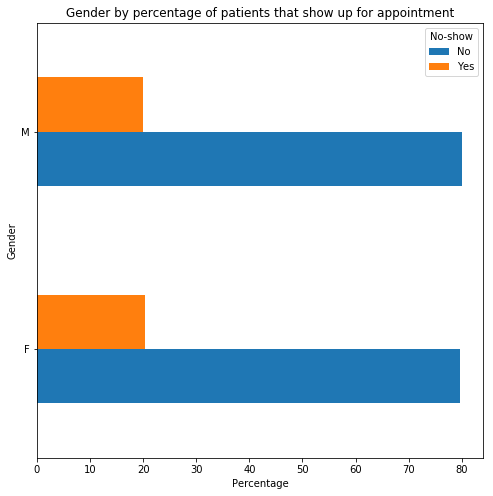

In [17]:
#Plot a bar chart of gender by percentage of patients that show up/not show up for their appointment
df_gender.plot(kind='barh', figsize=(8,8))

#Give the chart a title
plt.title ( "Gender by percentage of patients that show up for appointment");
plt.xlabel('Percentage'.title(), fontsize = 10)

>Both gender almost have equally missed their scheduled appointment. Gender is not a reliable factor predict patients that do not show up for their appointments.

### 2d What factors are important to note in order to predict if a patient will show up for their scheduled appointment? 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe512a82438>,
      dtype=object)

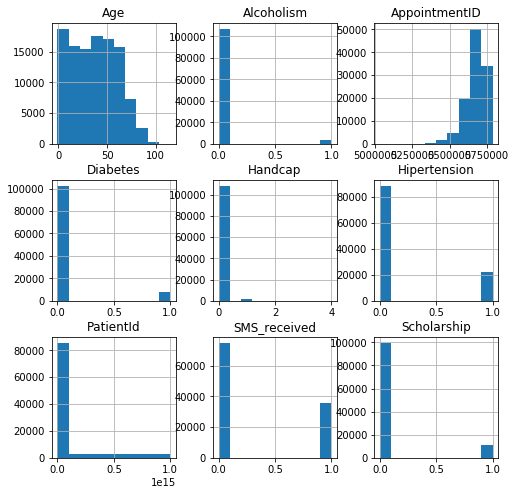

In [18]:
#Use histogram to see a chart-summary of the variables in the data

df.hist(figsize=(8,8))

### How many people did not show up?

In [19]:
df.head()

#check for the total number of people that did not show up for their appointment
sum(df['No-show'] == 'Yes')


22319

>Out of about 110 thousand patient, 22,319 of the do not show up for appointment

### What is the age distribution that schedules an appointment?

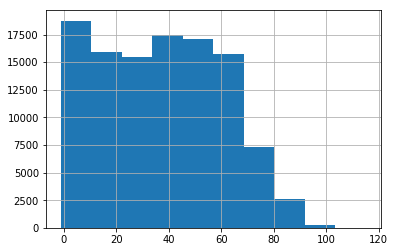

In [20]:
#The age bracket of people that schedule appointment
df['Age'].hist()

>Majority of those booked for appointment within age 0 to 60. Children less than 10 years of age are the ones most scheduled

## Time difference of the appointment day from the day patients scheduled appointment

In [40]:
#create an extra column to give the time difference of ScheduledDay and AppointmentDay
df['Time_diff'] = df.apply(lambda x: x['Appointment_Day'] - x['Booking_Day'], axis=1)


0           0 days 18:38:08
1           0 days 16:08:27
2           0 days 16:19:04
3           0 days 17:29:31
4           0 days 16:07:23
                ...        
110522   -35 days +09:15:35
110523   -35 days +07:27:33
110524   -41 days +16:03:52
110525   -41 days +15:09:23
110526   -41 days +13:30:56
Length: 110527, dtype: timedelta64[ns]

In [22]:
#Ensure the datatype in the new column is the correct type
#df.info('Time_diff')

In [23]:
#get table of Time_diff and No-show columns
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [24]:
#get a brief summary for those that didn't show up
a=df[df['No-show'] == 'Yes']
a.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Time_diff
count,2.231900e+04,2.231900e+04,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319
mean,1.467523e+14,5.652259e+06,34.317667,0.115507,0.169004,0.064071,0.030333,0.020297,0.438371,-16 days +15:42:25.001120
std,2.549905e+14,7.429686e+04,21.965941,0.319640,0.374764,0.244885,0.171505,0.156670,0.496198,16 days 14:24:19.715831
min,5.628261e+06,5.122866e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-179 days +10:40:59
25%,4.176779e+12,5.614192e+06,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-23 days +08:15:27
50%,3.156794e+13,5.657916e+06,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-11 days +16:17:29
75%,9.454270e+13,5.703175e+06,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-4 days +13:12:35
max,9.996585e+14,5.789986e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,6 days 13:49:20


> The minimum time difference is up to -179 days which shows that the appointment day that was issued to such a patient was way behind time. This shows an reasonable reason for such a patient not to show up as it was as good as the patient had no scheduled appointment.

In [25]:
#get a brief summary of data for those that showed up
b=df[df['No-show'] == 'No']
b.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Time_diff
count,8.820800e+04,8.820800e+04,88208.000000,88208.000000,88208.000000,88208.000000,88208.000000,88208.000000,88208.000000,88208
mean,1.476845e+14,5.681137e+06,37.790064,0.093903,0.204392,0.073837,0.030417,0.022742,0.291334,-9 days +17:03:13.775405
std,2.563747e+14,6.931225e+04,23.338878,0.291695,0.403259,0.261507,0.171732,0.162750,0.454380,14 days 12:57:11.876227
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-179 days +10:42:42
25%,4.168386e+12,5.646218e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-12 days +08:34:05
50%,3.176184e+13,5.685684e+06,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2 days +09:03:16
75%,9.433715e+13,5.731078e+06,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0 days 09:00:59.750000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,0 days 20:44:54


> It can be observed above that there are negative time difference in schedules. Let's dig further to see how much of the data is affected by negative time differences

In [26]:
#show count of those with negative schedules
df_negtime = df[df['Time_diff'] < '0 days']
print(df_negtime['No-show'].value_counts())

No     51437
Yes    20522
Name: No-show, dtype: int64


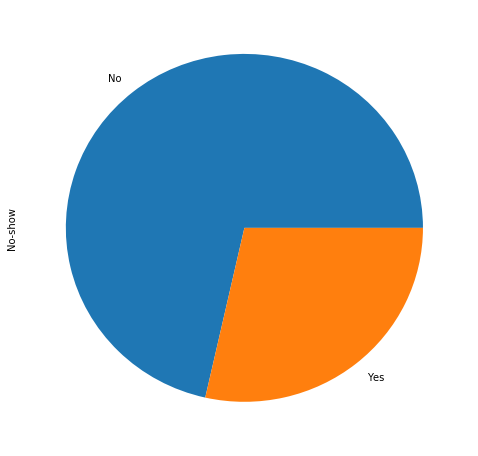

In [27]:
#plot a pie chart for show/no-show data negative time difference
df_negtime['No-show'].value_counts().plot(kind = 'pie', figsize = (8,8))

In [41]:
#show count of those with positive schedules
df_postime = df[df['Time_diff'] > '0 days']
print(df_postime['No-show'].value_counts())

No     36771
Yes     1797
Name: No-show, dtype: int64


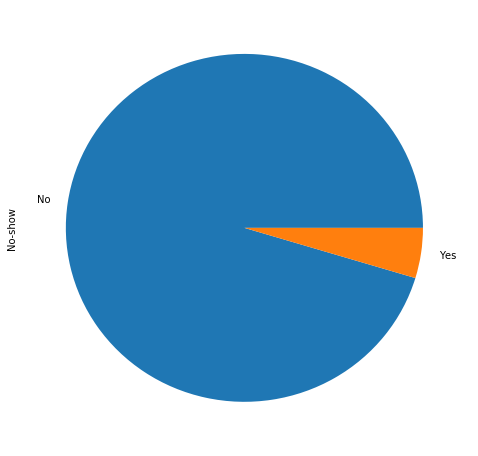

In [29]:
#let's work with the positive time difference
df_postime['No-show'].value_counts().plot(kind = 'pie', figsize = (8,8))

>Surprisingly! A greater number of patients with appointment dates behind the present date of scheduling an appointment were present for their appointment, than those that were had a positive time difference. Same goes for those that missed their appointment. This shows the table has unrealistics details in the scheduled date and appointment date, as it is impossible for a patinet to have already showed up for appointment time before being scheduled of appointment.

### The age distribution of those that do not show

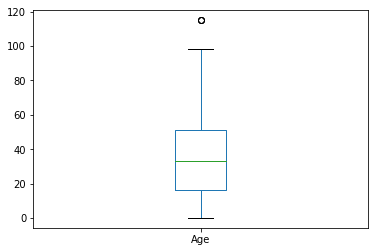

In [30]:
#Get the table of patient that did not show up
df_noshow = df[df['No-show'] == 'Yes']

#Get the table with column of just age and No-show 
df_age_noshow = df_noshow.iloc[:, np.r_[5:6, 13:14]]
df_age_noshow.plot(kind='box')

>The bulk of those that were absent for their appointment is more on those from age 30 and below

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe5126f9ef0>]],
      dtype=object)

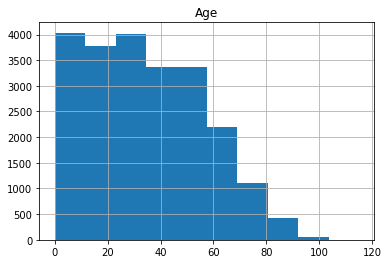

In [31]:
#Let's get the data of just those that did not show up for for appointment and the age bracket in such category
df_age_noshow.hist()

>Most people from age 0 to 30 missed their appointment

In [32]:
#Average distribution of those that show-up for appointment from those that do not.
df.groupby('No-show').mean()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
No-show,,,,,,,,,
No,1.476845e+14,5.681137e+06,37.790064,0.093903,0.204392,0.073837,0.030417,0.022742,0.291334
Yes,1.467523e+14,5.652259e+06,34.317667,0.115507,0.169004,0.064071,0.030333,0.020297,0.438371


>The average age of people that did not show up for their appointment are about age 34.

### How effective is the reminder factor via SMS?

In [33]:
# FOLLOW-UP
#df.head()
df_sms = df[df['SMS_received'] == 1]
df_sms.shape

(35482, 15)

> Of all the the 110,527 patients, 35,482 received SMS concerning their scheduled appointment

In [34]:
df_sms1= df_sms.groupby('No-show').describe()

In [35]:
df_sms1.iloc[:,:1]

,PatientId
,count
No-show,
No,25698.0
Yes,9784.0


>25,698 patients showed up for the scheduled appointment. That means approximately 62% of those that received SMS showed up for appointment.

## Does the health condition/qualification affect their presence on scheduled appointment time?

For those that show-up for appointment

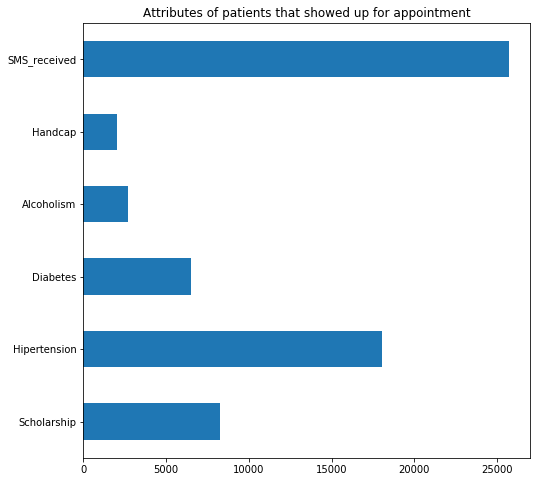

In [36]:
#Get the table for those that show up
df_show= df[df['No-show'] == 'No']

#Filter only columns that speak about health conditions
df_show.iloc[:, 7:13].sum().plot(kind='barh', figsize=(8,8))

plt.title ( "Attributes of patients that showed up for appointment");

For those that do not show-up for appointment

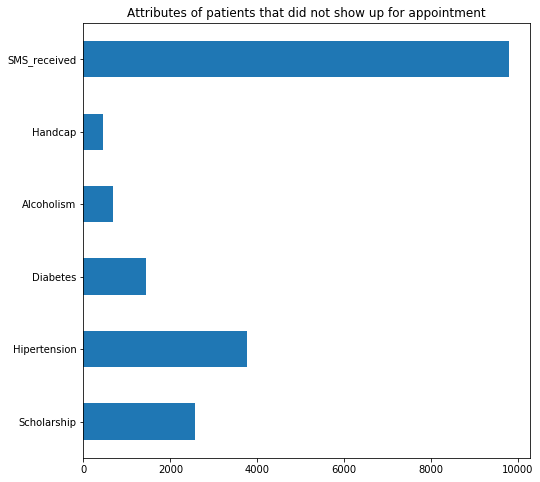

In [37]:
#Get the table for those that did not show up
df_noshow= df[df['No-show'] == 'Yes']

#Filter only columns that speak about health conditions
df_noshow.iloc[:, 7:13].sum().plot(kind='barh', figsize=(8,8))

plt.title ( "Attributes of patients that did not show up for appointment");

<a id='conclusions'></a>
## Conclusions

> From the above analysis, an important factor for us to note in order to predict if a patient will show up for their scheduled appointment is the follow up SMS. A greater percentage of patients who showed up for their appointment received SMS notification as reminder. 
Also, the age brackets of infants to adulthood (from age 0 to about age 30), tend to miss their scheduled appointments more than the older ones. Being handicapped, diabetic, alcohol addict plays little role in helping solve the factor behind those missing their appointments. In fact, the last two set of bar chart show to boost in the amount of patients showing up for their appointments. 

## Limitation
> The appointment date is backdates from the date of booking. This defiles the law of nature in relation to time. 
>There are also not enough information to put into better perspective the reason for the patients missing their appointments.


In [38]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0